In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display

In [2]:
df = pd.read_csv('bank.csv', delimiter=";")

In [3]:
shape = df.shape
print('Number of rows: ', shape[0])
print('Number of columns: ', shape[1])

Number of rows:  41188
Number of columns:  21


In [4]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [5]:
all_columns = df.columns
goal_attribute = 'y'
predictors = all_columns.drop(goal_attribute)

categorical_predictors = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
numeric_predictors = predictors.drop(categorical_predictors)

print('Predictors:', list(predictors))
print()
print('Categorical Predictors:', list(categorical_predictors))
print()
print('Numeric Predictors:', list(numeric_predictors))

Predictors: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

Categorical Predictors: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

Numeric Predictors: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


### Y Counts

In [6]:
y_counts = df['y'].value_counts()
y_percentage = df['y'].value_counts(normalize=True)*100

y_var_dataframe = pd.DataFrame({
    "Count": y_counts,
    "Percentage": y_percentage
})

y_var_dataframe

,Count,Percentage
y,,
no,36548,88.734583
yes,4640,11.265417


### Descriptive statistics for numeric predictors

In [7]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Information about categorical predictors

In [8]:
for col in categorical_predictors:
    print(f"{col}: {df[col].unique()}\n")


unknown_predictors = [
    col for col in categorical_predictors if df[col].astype(str).str.contains("unknown", case=False).any()
]

markdown_output = "#### Some predictors have \"unknown\" label.\n"
markdown_output += "\n".join(f"- {col}" for col in unknown_predictors)
display(Markdown(markdown_output))

job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

marital: ['married' 'single' 'divorced' 'unknown']

education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

default: ['no' 'unknown' 'yes']

housing: ['no' 'yes' 'unknown']

loan: ['no' 'yes' 'unknown']

contact: ['telephone' 'cellular']

month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

day_of_week: ['mon' 'tue' 'wed' 'thu' 'fri']

poutcome: ['nonexistent' 'failure' 'success']



#### Some predictors have "unknown" label.
- job
- marital
- education
- default
- housing
- loan

In [9]:
missing_values = df.isna().sum()
missing_values

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

#### While the dataset does not contain any missing (NaN) values, the presence of the label "unknown" in certain predictors indicates unreported information and should be treated as missing during data cleaning.


In [10]:
# Count "unknown" values before cleaning
print("Before cleaning:")
for col in unknown_predictors:
    count = (df[col].astype(str).str.lower() == "unknown").sum()
    if count > 0:
        print(f"{col}: {count} unknowns")

df[unknown_predictors] = df[unknown_predictors].replace('unknown', pd.NA)
missing_values = df.isna().sum()

print()
print('Missing Values (Unknown converted do NaN)')
print(missing_values)

original_num_rows = df.shape[0]
print(original_num_rows)
df = df.dropna()
missing_values_after_drop = df.isna().sum()
num_rows_after_cleanup = df.shape[0]
print(num_rows_after_cleanup)

print()
print('Missing Values after cleaning')
print(missing_values_after_drop)

deleted_rows = original_num_rows-num_rows_after_cleanup
print()
print(deleted_rows, 'rows deleted')

Before cleaning:
job: 330 unknowns
marital: 80 unknowns
education: 1731 unknowns
default: 8597 unknowns
housing: 990 unknowns
loan: 990 unknowns

Missing Values (Unknown converted do NaN)
age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64
41188
30488

Missing Values after cleaning
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous     

     Count  Percentage
y                     
no   26629   87.342561
yes   3859   12.657439


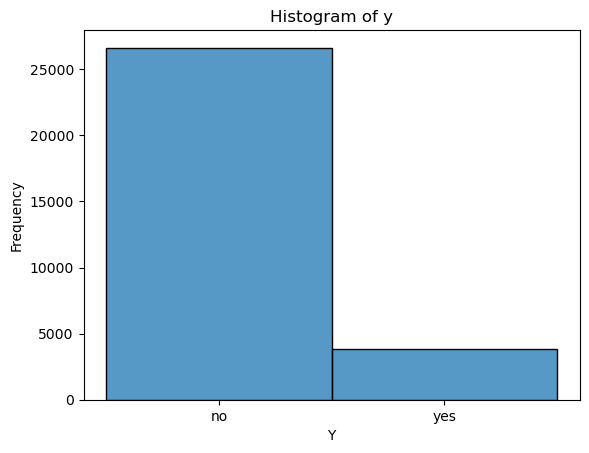

In [11]:
y_counts = df['y'].value_counts()
y_percentage = df['y'].value_counts(normalize=True)*100

y_var_dataframe = pd.DataFrame({
    "Count": y_counts,
    "Percentage": y_percentage
})

print(y_var_dataframe)

sns.histplot(df[goal_attribute])

plt.title(f"Histogram of {goal_attribute}")
plt.xlabel("Y")
plt.ylabel("Frequency")

plt.show()

## Univariate Analysis

#### Numeric Predictors

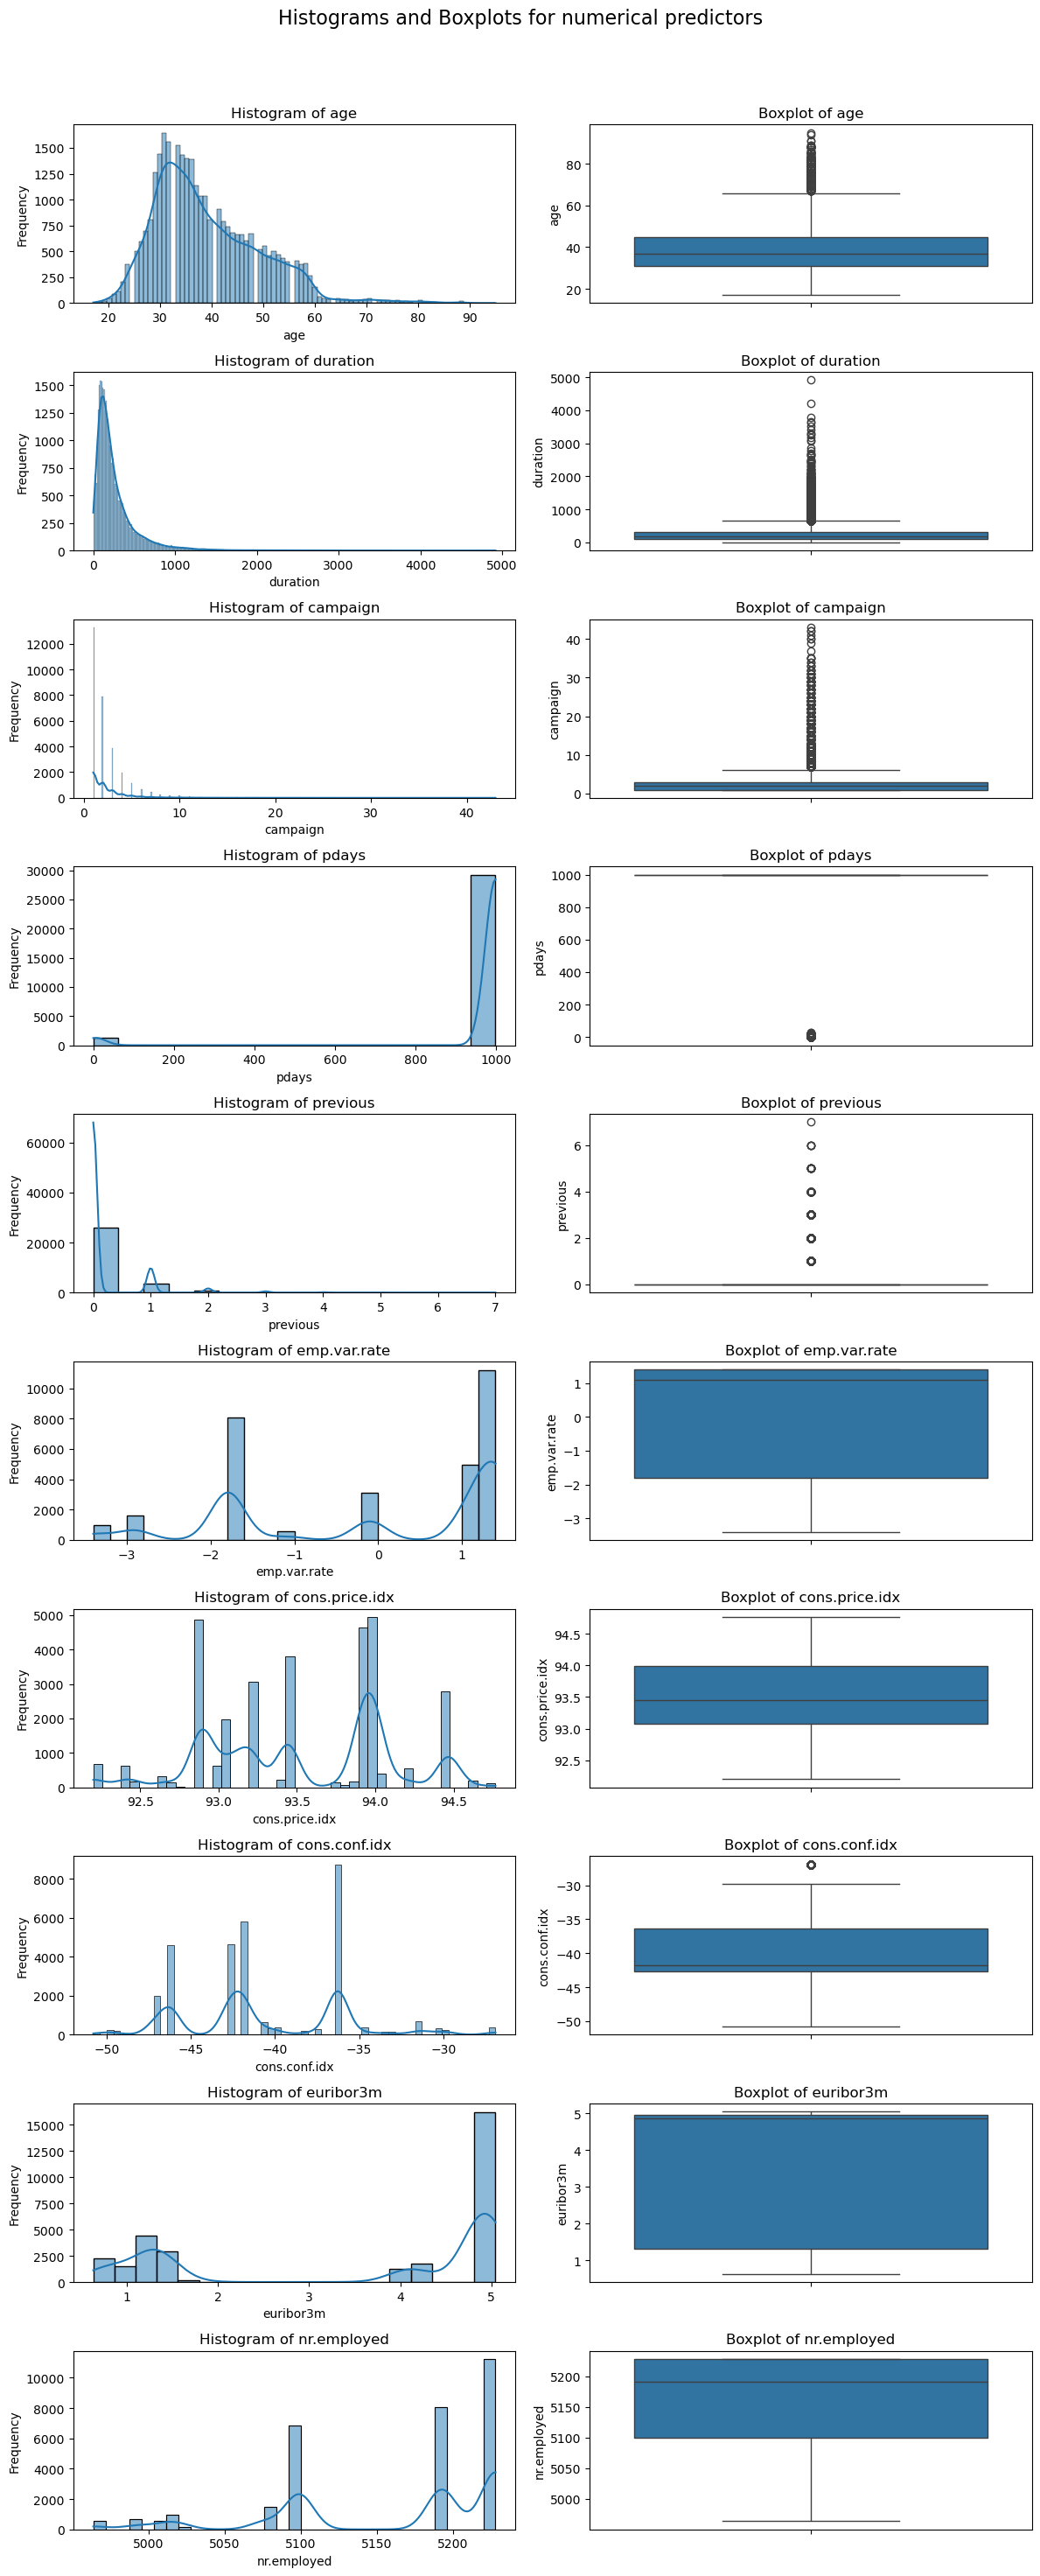

In [12]:
fig, axe = plt.subplots(nrows = len(numeric_predictors), ncols = 2, figsize = (12, 3*len(numeric_predictors)))
fig.suptitle('Histograms and Boxplots for numerical predictors', fontsize=16)

for i, column in enumerate(numeric_predictors):
    sns.histplot(df[column], ax=axe[i, 0], kde=True)
    axe[i, 0].set_title(f"Histogram of {column}")
    axe[i, 0].set_xlabel(column)
    axe[i, 0].set_ylabel("Frequency")

    sns.boxplot(y=df[column], ax=axe[i, 1])
    axe[i, 1].set_title(f"Boxplot of {column}")
    axe[i, 1].set_ylabel(column)


plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

#### Categorical Predictors

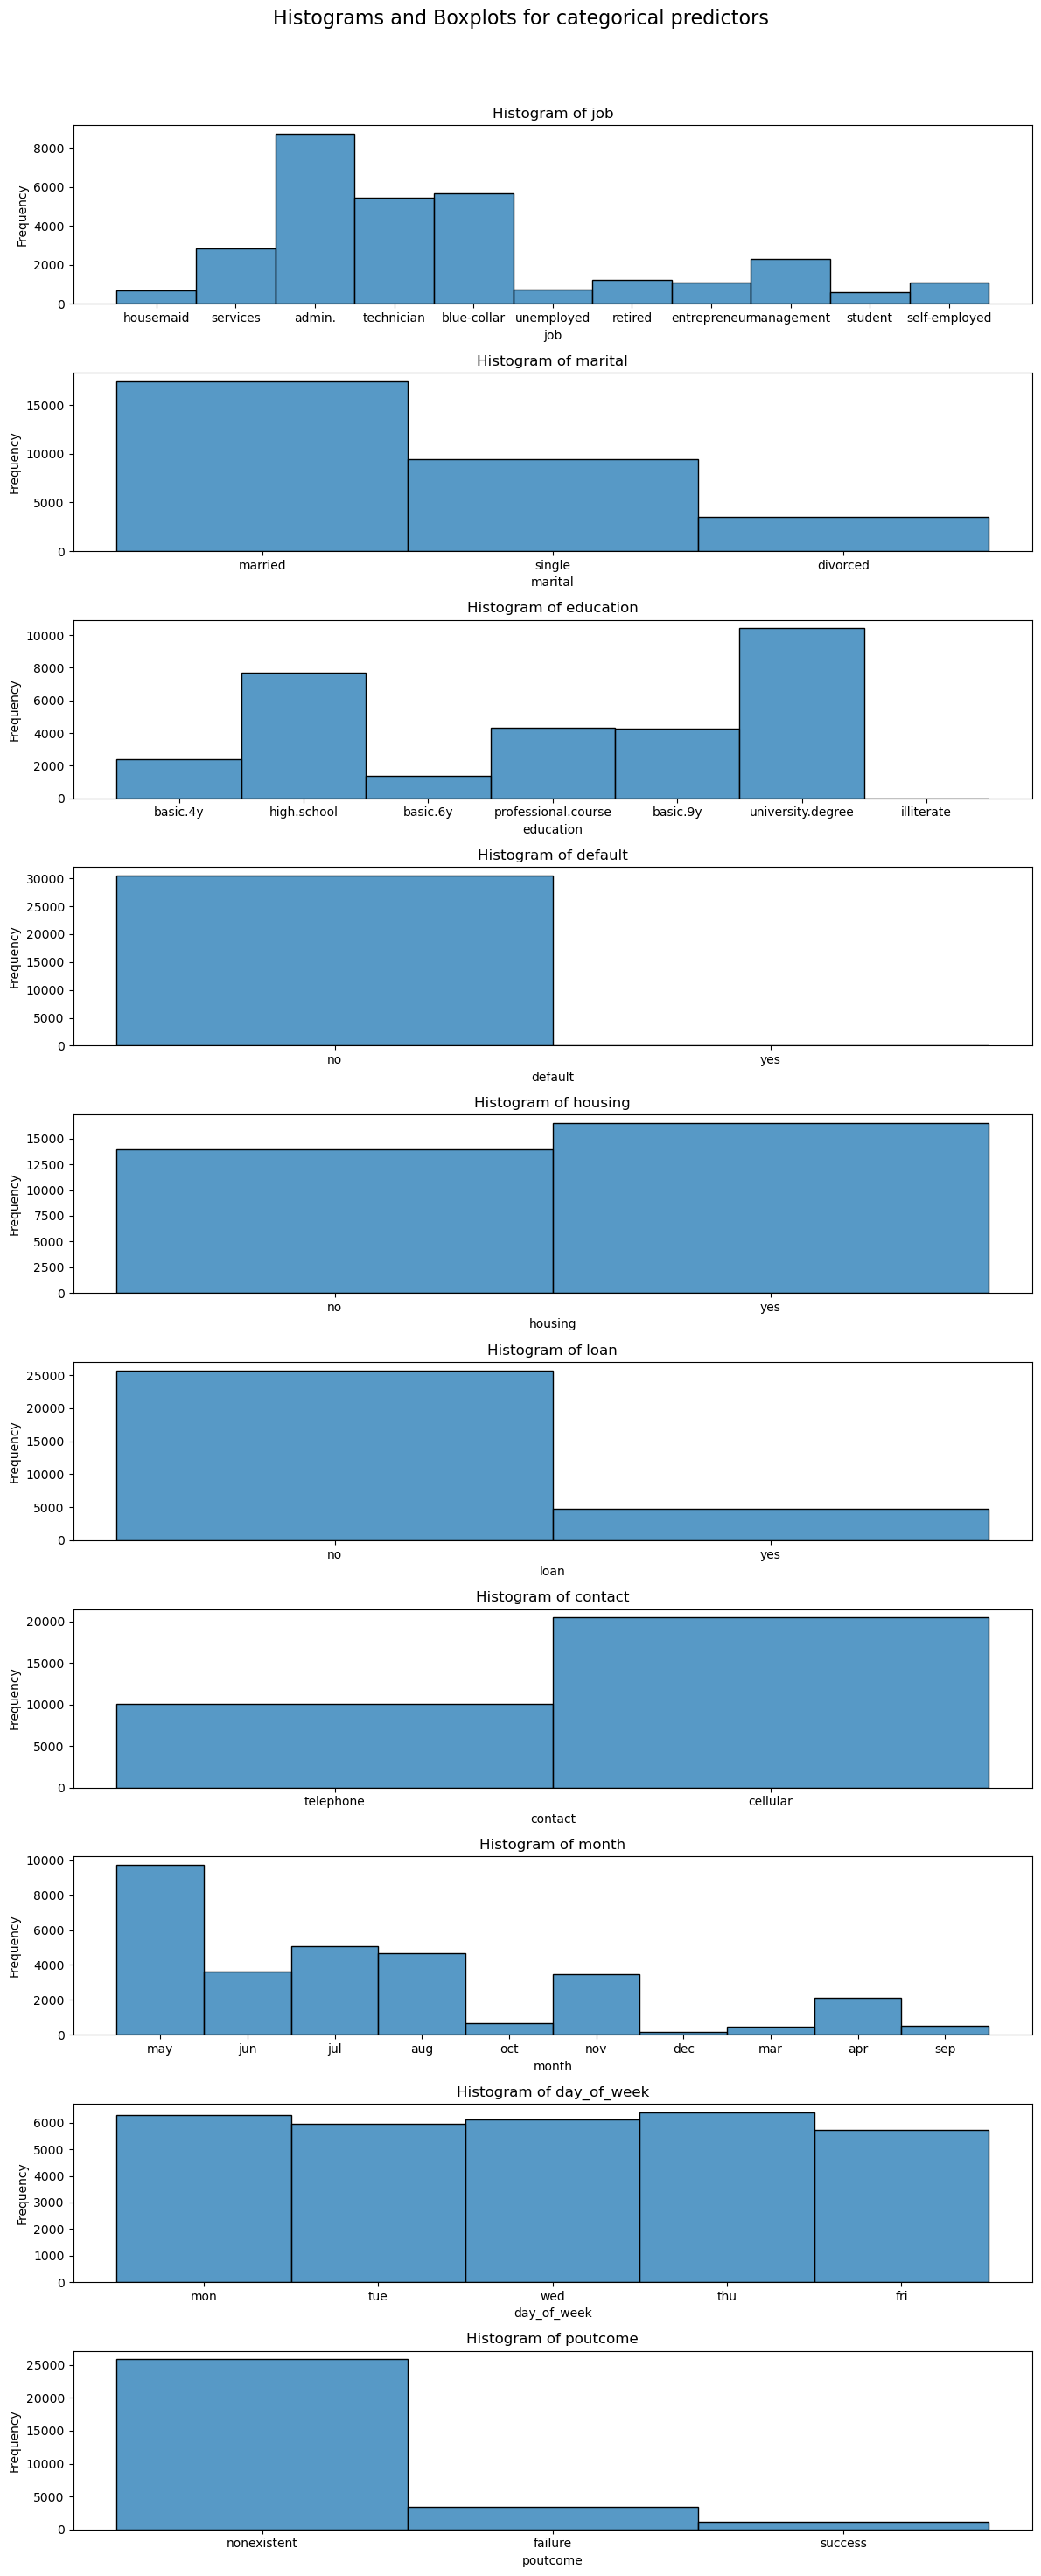

In [15]:
fig, axe = plt.subplots(nrows = len(categorical_predictors), ncols = 1, figsize = (12, 3*len(categorical_predictors)))
fig.suptitle('Histograms and Boxplots for categorical predictors', fontsize=16)

for i, column in enumerate(categorical_predictors):
    sns.histplot(df[column], ax=axe[i])
    axe[i].set_title(f"Histogram of {column}")
    axe[i].set_xlabel(column)
    axe[i].set_ylabel("Frequency")



plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

## Bivariate Analysis